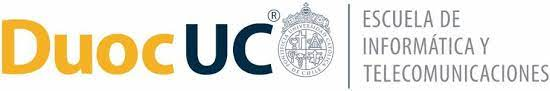

# Examen Transversal: Caso Forma A


Integrantes:
* Cristobal azocar
* Javier Jorquera

Docente: Jorge Anais
     

Sección: DLY0100 - 001D

##Contexto


Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.

Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. Un paso central para todas estas implementaciones es la clasificación de imágenes. Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.

Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, que consta de imágenes en escala de grises de 28
× 28 de 70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

## Objetivo del Proyecto


El objetivo de este notebook es diseñar, implementar y optimizar una red neuronal que pueda clasificar con precisión los dígitos manuscritos del dataset MNIST. Buscaremos explorar distintas arquitecturas de red, técnicas de regularización y métodos de optimización para mejorar la capacidad de generalización de nuestro modelo.

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP)



#### Importamos librerías necesarias

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#### Carga de datos

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255

# class names are not included, need to create them to plot the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


### Distribución imagenes para "Test" y "Train"

In [ ]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


### Primeras 25 imagenes con el nombre de las clases

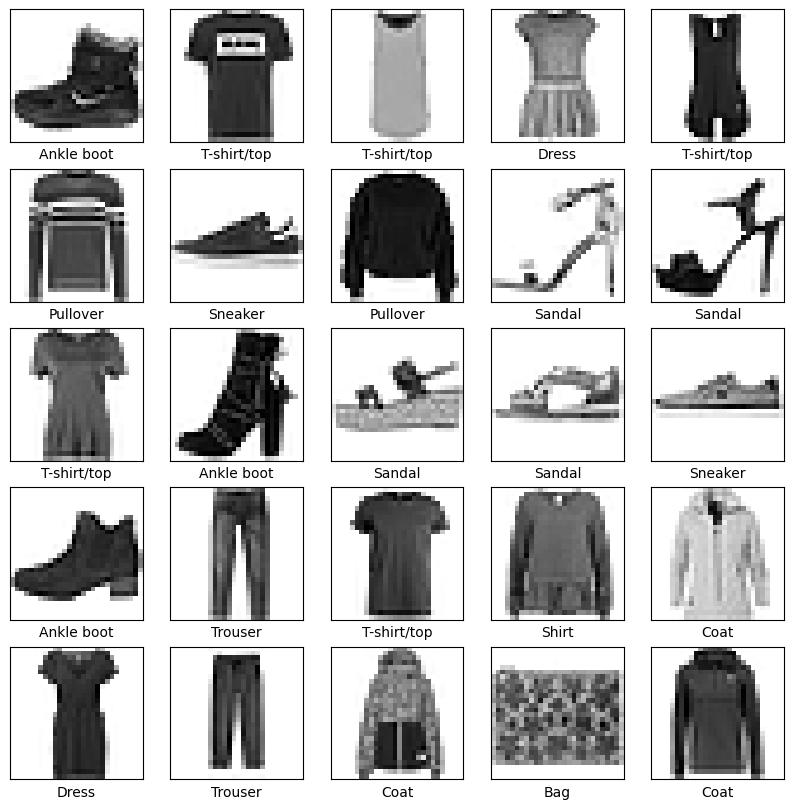

In [ ]:
# display the first 25 images from the training set and
# display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])

### Primera imagen de el dataset de "Train"

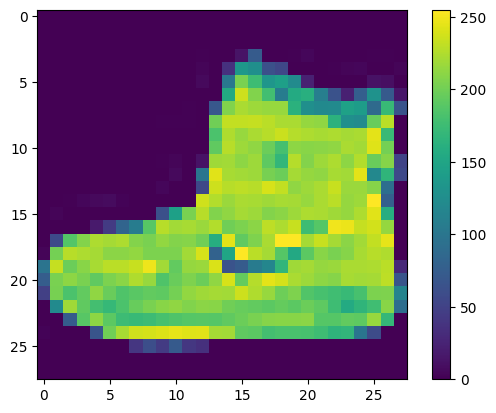

In [ ]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Transformación de datos

In [ ]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test
X_train = train_images.reshape(60000,28*28)
X_test = test_images.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(train_labels, 10)
Y_test = keras.utils.to_categorical(test_labels, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)


### Cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

In [ ]:
M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

784 10 60000 10000


### Redes y capas escondidas

>> #### ReLU

##### ReLU (1 capa escondida)

In [ ]:
# red 1 con relu
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 1 capas escondidas!)

h1 = 128   # Número de neuronas en la capa escondida

red1 = keras.Sequential()
red1.add(keras.layers.Dense(h1, input_dim=N,activation='relu'))
red1.add(keras.layers.Dense(C, activation='softmax'))


red1.summary()

red1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red1.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 7ms/step - loss: 0.5964 - accuracy: 0.7959 - val_loss: 0.4807 - val_accuracy: 0.8295
Epoch 2/20
300/300 [==============================] - 2s 6ms/step - loss: 0.4160 - accuracy: 0.8544 - val_loss: 0.4273 - val_accuracy: 0.8495
Epoch 3/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3773 - accuracy: 0.8674 - val_loss: 0.3990 - val

##### ReLU (2 capas escondidas)

In [ ]:
# red 2 con relu
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 2 capas escondidas!)

h1 = 128

red1_2 = keras.Sequential()
red1_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red1_2.add(keras.layers.Dense(h1, activation='relu'))
red1_2.add(keras.layers.Dense(C, activation='softmax'))


red1_2.summary()

red1_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 12ms/step - loss: 0.5659 - accuracy: 0.8040 - val_loss: 0.4436 - val_accuracy: 0.8452
Epoch 2/20
300/300 [==============================] - 3s 11ms/step - loss: 0.3939 - accuracy: 0.8600 - val_loss: 0.4004 - val_accuracy

##### ReLU (3 capas escondidas)

In [ ]:
# red 3 con relu
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 3 capas escondidas!)

h1 = 128

red1_3 = keras.Sequential()
red1_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red1_3.add(keras.layers.Dense(h1, activation='relu'))
red1_3.add(keras.layers.Dense(h1, activation='relu'))
red1_3.add(keras.layers.Dense(C, activation='softmax'))


red1_3.summary()

red1_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red1_3.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               100480    
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 10ms/step - loss: 0.5664 - accuracy: 0.8030 - val_loss: 0.4393 - val_accuracy: 0.8431
Ep

>> #### Tanh

##### Tanh (1 capa escondida)

In [ ]:
# Red 1 con tanh
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 1 capa escondida)

h1 = 128

red2 = keras.Sequential()
red2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh'))
red2.add(keras.layers.Dense(C, activation='softmax'))

red2.summary()

red2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red2.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test)
)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               100480    
                                                                 
 dense_36 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 0.5600 - accuracy: 0.8061 - val_loss: 0.4637 - val_accuracy: 0.8329
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.4061 - accuracy: 0.8567 - val_loss: 0.4177 - val_accuracy: 0.8514
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.3707 - accuracy: 0.8667 - val_loss: 0.3996 - val_

##### Tanh (2 Capas escondidas)

In [ ]:
# Red 2 con tanh
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 2 capas escondidas)

h1 = 128

red2_1 = keras.Sequential()
red2_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh'))
red2_1.add(keras.layers.Dense(h1, activation='tanh'))
red2_1.add(keras.layers.Dense(C, activation='softmax'))

red2_1.summary()

red2_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red2_1.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test)
)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               100480    
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 9ms/step - loss: 0.5307 - accuracy: 0.8108 - val_loss: 0.4510 - val_accuracy: 0.8382
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.3812 - accuracy: 0.8626 - val_loss: 0.3943 - val_accuracy: 

##### Tanh (3 Capas escondidas)

In [ ]:
# Red 3 con tanh
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 3 capas escondidas!)

h1 = 128

red2_2 = keras.Sequential()
red2_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh'))
red2_2.add(keras.layers.Dense(h1, activation='tanh'))
red2_2.add(keras.layers.Dense(h1, activation='tanh'))
red2_2.add(keras.layers.Dense(C, activation='softmax'))


red2_2.summary()

red2_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red2_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 9ms/step - loss: 0.5144 - accuracy: 0.8156 - val_loss: 0.4285 - val_accuracy: 0.8447
Epo

>> #### Sigmoid

##### Sigmoid (1 capa escondida)

In [ ]:
# Red 1 con Sigmoid
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 1 capa escondida)

h1 = 128

red3 = keras.Sequential()
red3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid'))
red3.add(keras.layers.Dense(C, activation='softmax'))

red3.summary()

red3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red3.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test)
)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 8ms/step - loss: 0.7481 - accuracy: 0.7672 - val_loss: 0.5366 - val_accuracy: 0.8140
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.4689 - accuracy: 0.8367 - val_loss: 0.4856 - val_accuracy: 0.8264
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.4184 - accuracy: 0.8521 - val_loss: 0.4369 - val_

##### Sigmoid (2 capas escondidas)

In [ ]:
# Red 2 con Sigmoid
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 2 capas escondidas)

h1 = 128

red3_1 = keras.Sequential()
red3_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid'))
red3_1.add(keras.layers.Dense(h1, activation='sigmoid'))
red3_1.add(keras.layers.Dense(C, activation='softmax'))

red3_1.summary()

red3_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red3_1.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test)
)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               100480    
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dense_48 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 12ms/step - loss: 0.9114 - accuracy: 0.7127 - val_loss: 0.5444 - val_accuracy: 0.8087
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.4651 - accuracy: 0.8367 - val_loss: 0.4785 - val_accuracy:

##### Sigmoid (3 capas escondidas)

In [ ]:
# Red 3 con Sigmoid
np.random.seed(30)
tf.random.set_seed(30)

# Creamos nuestra red feed-forward (tiene 3 capas escondidas!)

h1 = 128

red3_3 = keras.Sequential()
red3_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid'))
red3_3.add(keras.layers.Dense(h1, activation='sigmoid'))
red3_3.add(keras.layers.Dense(C, activation='softmax'))


red3_3.summary()

red3_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

red3_3.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 128)               100480    
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 7ms/step - loss: 0.9058 - accuracy: 0.7225 - val_loss: 0.5375 - val_accuracy: 0.8083
Epoch 2/20
300/300 [==============================] - 3s 10ms/step - loss: 0.4610 - accuracy: 0.8375 - val_loss: 0.4796 - val_accuracy:

---


#### Métricas de Rendimiento

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ _1_ capas ocultas }& {0.8848-2s} & {0.8864-4s} & {0.8800-2s} & {} & {} & {} \\
\text{ _2_ capas ocultas } & {0.8906-2s} & {0.8868-2s} & {0.8857-2s} & {} & {} & {} \\
\text{ _3_ capas ocultas } & {0.8911-3s} & {0.8892-3s} & {0.8845-2s} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$



⚛ Precisión de validación (val_acc):

En general, la función de activación ReLU obtuvo las mejores precisiones de validación en comparación con Tanh y Sigmoid.
Al aumentar el número de capas ocultas, la precisión de validación no mejoró significativamente con ReLU y Sigmoid. Sin embargo, con Tanh, hubo un ligero aumento al pasar de 2 a 3 capas ocultas.

⚛ Tiempo de entrenamiento:

El tiempo de entrenamiento fue similar para ReLU y Sigmoid, independientemente del número de capas ocultas.
Tanh requirió un tiempo de entrenamiento ligeramente mayor, especialmente al aumentar a 3 capas ocultas.


⚛ Impacto de la función de activación:

ReLU demostró ser la función de activación más efectiva para este problema de clasificación de imágenes, alcanzando la mayor precisión de validación con todas las configuraciones de capas ocultas.
Tanh y Sigmoid tuvieron un rendimiento similar, pero inferior a ReLU.


⚛ Cambios en el tiempo de entrenamiento:

El tiempo de entrenamiento puede variar según la función de activación utilizada debido a la complejidad de los cálculos involucrados.
En este caso, Tanh requirió más tiempo de entrenamiento, probablemente porque involucra cálculos más complejos en comparación con ReLU y Sigmoid.

---

## Parte 2. Backpropagation



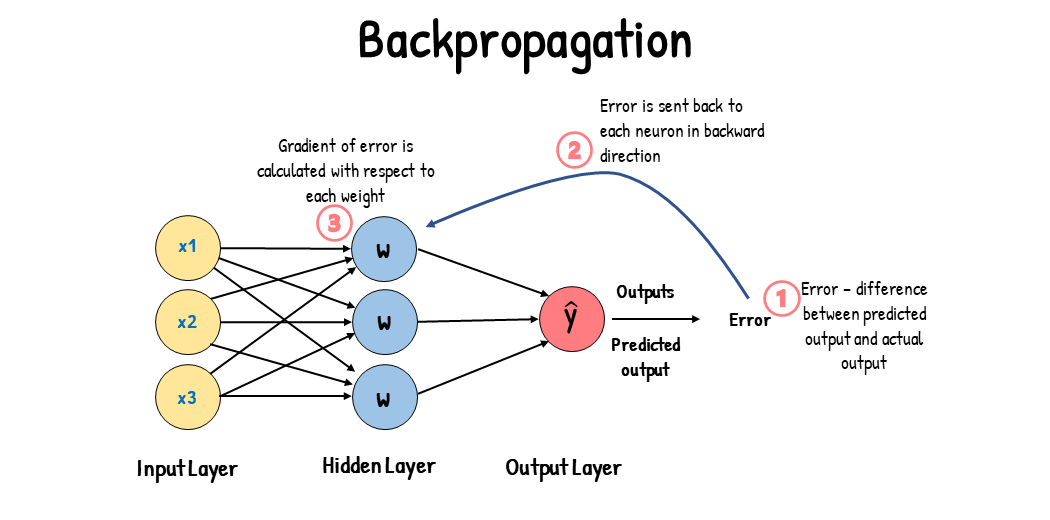

 Backpropagation es un algoritmo utilizado para entrenar redes neuronales artificiales. Su objetivo es calcular el gradiente de la función de pérdida con respecto a los pesos de la red, de manera eficiente y precisa.

La función de backpropagation consta de dos pasos principales:
1. Propagación hacia adelante: se calcula la salida de la red para un ejemplo de entrada.
2. Propagación hacia atrás: se calcula el gradiente de la función de pérdida con respecto a los pesos, utilizando la regla de la cadena de derivación.

La diferencia entre backpropagation y el descenso de gradiente es:
- Backpropagation es un algoritmo específico utilizado para calcular los gradientes en redes neuronales.
- El descenso de gradiente es un concepto más general que se utiliza para optimizar funciones mediante la actualización iterativa de los parámetros en la dirección opuesta al gradiente.

El descenso de gradiente consiste en:
1. Calcular el gradiente de la función de pérdida con respecto a los parámetros (por ejemplo, los pesos de la red neuronal).
2. Actualizar los parámetros restando el gradiente multiplicado por una tasa de aprendizaje (learning rate).
3. Repetir los pasos 1 y 2 hasta que se alcance una solución óptima o se cumpla un criterio de parada.

En resumen, backpropagation es un algoritmo específico para calcular de forma eficiente los gradientes en redes neuronales, mientras que el descenso de gradiente es un concepto más general utilizado para optimizar funciones mediante la actualización iterativa de los parámetros.

---

## Parte 3. Regularización del modelo



### Dropout
Por cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta, Lo que se consigue con esto es que ninguna neurona memorice parte de la entrada; que es precisamente lo que sucede cuando tenemos sobreajuste. Una vez tengamos el modelo listo para realizar predicciones sobre muestras nuevas, debemos compensar de alguna manera el hecho de que no todas las neuronas permanecieran activas en entrenamiento. Un ejemplo de dicha compensación podría ser multiplicar todos los parámetros por la probabilidad de no descarte.



### Batch normalization
La normalización en lotes consiste básicamente en añadir un paso extra, habitualmente entre las neuronas y la función de activación, con la idea de normalizar las activaciones de salida. Lo ideal es que la normalización se hiciera usando la media y la varianza de todo el conjunto de entrenamiento.

> “Agregamos drop out para controlar el sobreajuste y Batch normalizationpara acelerar la optimización”





In [ ]:
# red 2 con relu (Red con mejor rendimiento)

np.random.seed(30)
tf.random.set_seed(30)


# Creamos nuestra red feed-forward (tiene 2 capas escondidas!)

h1 = N
h2 = 128

red1_2 = keras.Sequential()
red1_2.add(keras.layers.Dense(h2, input_dim=N, activation='relu'))
red1_2.add(keras.layers.Dense(h2, activation='relu'))
#red1_2.add(keras.layers.Dense(h2, activation='relu'))
red1_2.add(keras.layers.Dense(C, activation='softmax'))


red1_2.summary()

red1_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 733722 (2.80 MB)
Trainable params: 733722 (2.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 8s 23ms/step - loss: 0.5190 - accuracy: 0.8158 - val_loss: 0.4174 - val_accuracy: 0.8506
Epoch 2

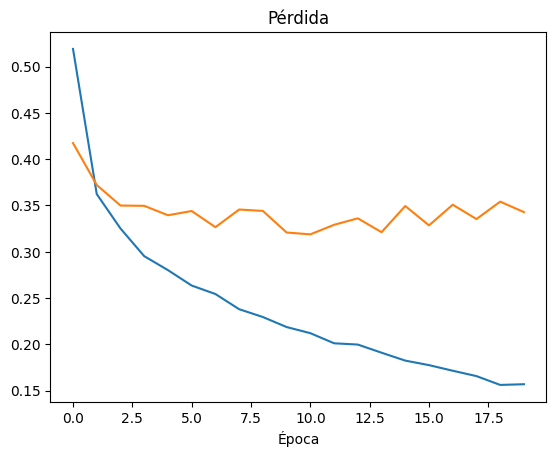

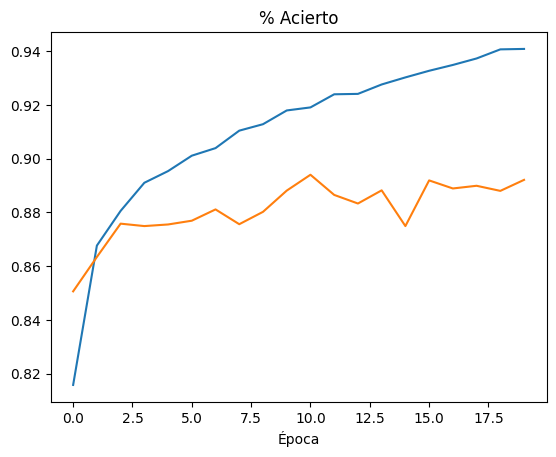

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

### Early stopping

El "early stopping" es una técnica utilizada en el entrenamiento de modelos de aprendizaje automático, incluyendo redes neuronales, para evitar el sobreajuste y mejorar la generalización del modelo.

>> Si bien gracias a la Técnica early stoping pudimos mejorar el modelo, no será utilizada por provocar underfiting

In [ ]:
# Detener el entrenamiento cuando no haya mejora en el val_loss durante 5 épocas consecutivas
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test),
       callbacks=[early_stopping])

Epoch 1/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1515 - accuracy: 0.9429 - val_loss: 0.3686 - val_accuracy: 0.8811
Epoch 2/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1464 - accuracy: 0.9447 - val_loss: 0.3478 - val_accuracy: 0.8936
Epoch 3/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1392 - accuracy: 0.9480 - val_loss: 0.3750 - val_accuracy: 0.8868
Epoch 4/20
300/300 [==============================] - 6s 20ms/step - loss: 0.1360 - accuracy: 0.9483 - val_loss: 0.4199 - val_accuracy: 0.8763
Epoch 5/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1344 - accuracy: 0.9494 - val_loss: 0.3492 - val_accuracy: 0.8863
Epoch 6/20
300/300 [==============================] - 6s 19ms/step - loss: 0.1295 - accuracy: 0.9506 - val_loss: 0.3598 - val_accuracy: 0.8859
Epoch 7/20
300/300 [==============================] - 7s 22ms/step - loss: 0.1253 - accuracy: 0.9524 - val_loss: 0.3671 - val_accuracy: 0.8863

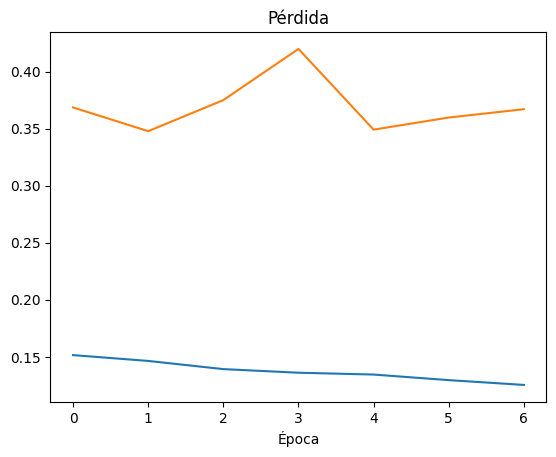

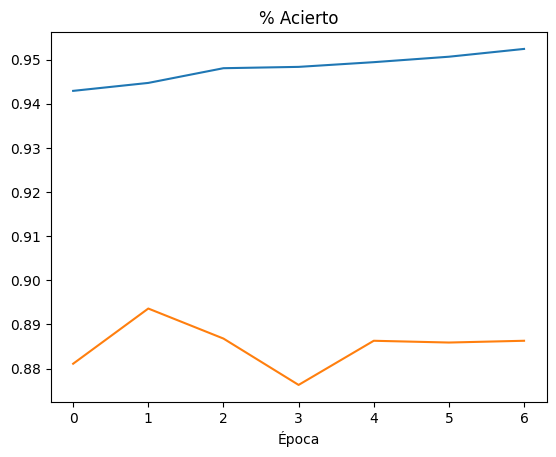

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

In [ ]:
from keras.layers import BatchNormalization,Dropout,Activation
# red 2 con relu (Red con mejor rendimiento)

np.random.seed(30)
tf.random.set_seed(30)


# Creamos nuestra red feed-forward (tiene 2 capas escondidas!)

h1 = 512
h2 = 128

red1_2 = keras.Sequential()
red1_2.add(keras.layers.Dense(N, input_dim=N))
red1_2.add(BatchNormalization())
red1_2.add(Activation('relu'))
red1_2.add(keras.layers.Dense(h2))
red1_2.add(BatchNormalization())
red1_2.add(Activation('relu'))
red1_2.add(keras.layers.Dense(C, activation='softmax'))


red1_2.summary()

red1_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 784)               615440    
                                                                 
 batch_normalization_46 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 activation_23 (Activation)  (None, 784)               0         
                                                                 
 dense_105 (Dense)           (None, 128)               100480    
                                                                 
 batch_normalization_47 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 128)             

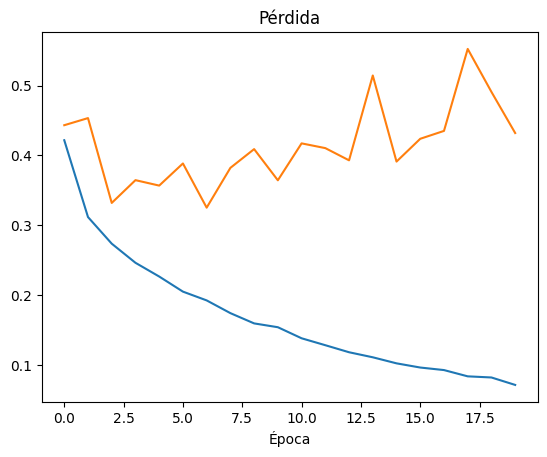

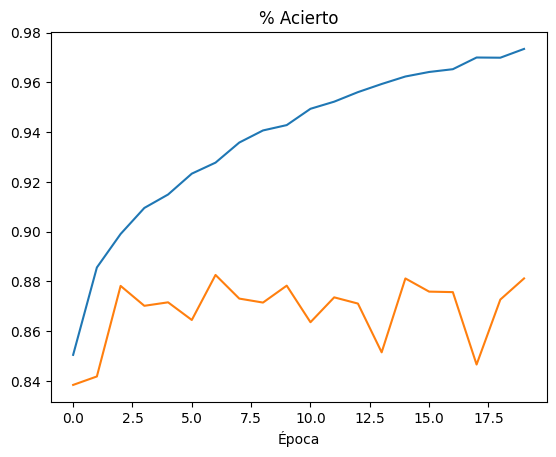

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

In [ ]:
from keras.layers import Dropout

np.random.seed(30)
tf.random.set_seed(30)

h2 = 128
red1_2 = keras.Sequential()
red1_2.add(keras.layers.Dense(h2, input_dim=N, activation='relu'))
red1_2.add(Dropout(0.2))
red1_2.add(keras.layers.Dense(h2, activation='relu'))
red1_2.add(Dropout(0.2))
red1_2.add(keras.layers.Dense(C, activation='softmax'))


red1_2.summary()

red1_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

histD = red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300

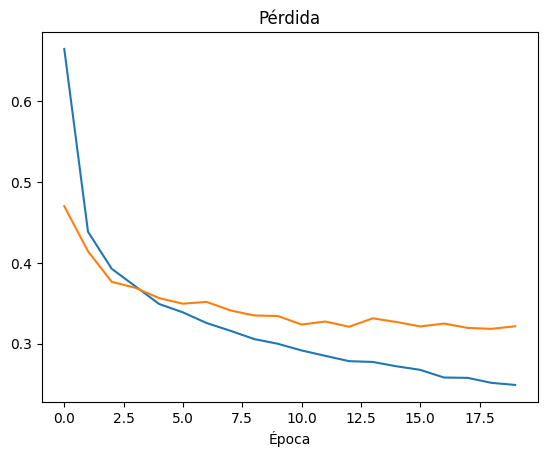

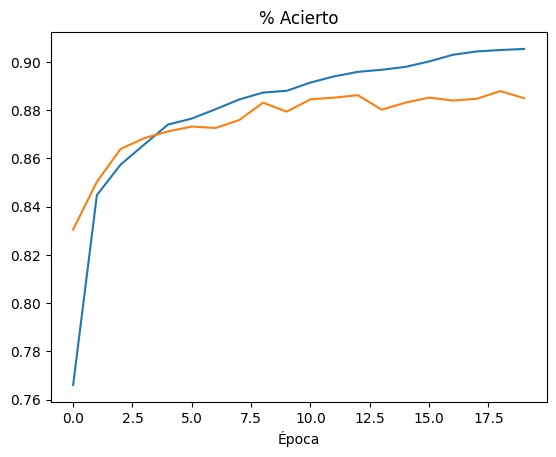

In [ ]:
plt.plot(histD.history['loss'])
plt.plot(histD.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(histD.history['accuracy'])
plt.plot(histD.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

In [ ]:
from keras.layers import Dropout

np.random.seed(30)
tf.random.set_seed(30)

h2 = 128
red1_2 = keras.Sequential()
red1_2.add(keras.layers.Dense(N, input_dim=N, activation='relu'))
red1_2.add(Dropout(0.2))
red1_2.add(keras.layers.Dense(h2, activation='relu'))
red1_2.add(Dropout(0.2))
red1_2.add(keras.layers.Dense(C, activation='softmax'))


red1_2.summary()

red1_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

histD = red1_2.fit(X_train, Y_train,
        epochs=20,
        batch_size=200,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 784)               615440    
                                                                 
 dropout_48 (Dropout)        (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 128)               100480    
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/30

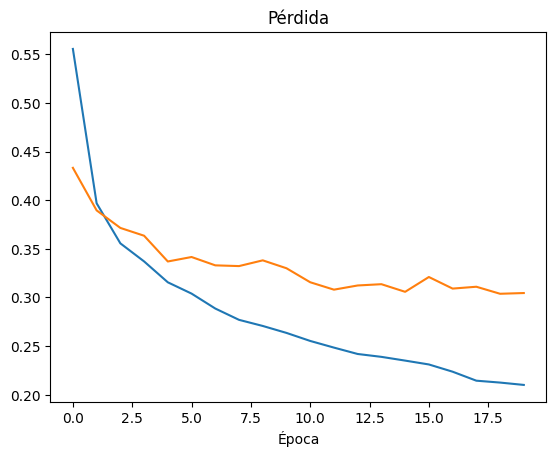

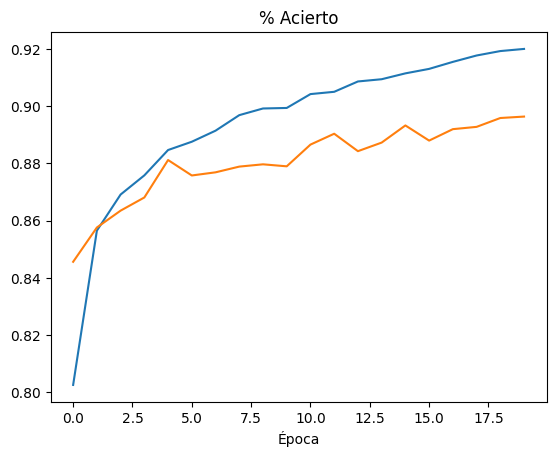

In [ ]:
plt.plot(histD.history['loss'])
plt.plot(histD.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(histD.history['accuracy'])
plt.plot(histD.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

Después de testear el desempeño de diferentes técnicas de regularización lo mejor que nos funciono fue:

1)	Mantener la cantidad de capas ocultas pero aumentar la cantidad de neuronas

2)	Aplicar drop out al 20%

Esto nos permitió mantener un modelo con un buen ajuste además sin descuidar la exactitud del set de validacion


---

## Parte 4. Optimizadores y Normalización

### ¿Qué es un optimizador?

Un optimizador es un algoritmo esencial que ayuda a minimizar (o maximizar, dependiendo de la configuración) la función de pérdida del modelo mediante la actualización sistemática de los pesos y los bias en la dirección que reduce el error. Su función principal es permitir que el modelo aprenda de los datos proporcionados ajustando sus parámetros internos de manera eficaz y eficiente.

---

 #### **Tasa de Aprendizaje: Constante vs. Adaptativa**

 **Tasa de Aprendizaje Constante:**

 * **Pros**: Simplicidad y control. Ofrece un enfoque uniforme que puede ser efectivo en problemas menos complejos donde el gradiente no varía significativamente a través de las diferentes partes del espacio de parámetros.

* **Contras**: Puede ser menos eficiente en problemas complejos con superficies de error irregulares, ya que una tasa única para todos los parámetros puede no ser óptima a lo largo de todo el proceso de entrenamiento. Requiere más experimentación para ajustar correctamente.


**Tasa de Aprendizaje Adaptativa:**

 * **Pros**: Ajuste dinámico. Optimizadores como Adam ajustan la tasa de aprendizaje para cada parámetro basándose en estimaciones de los primeros y segundos momentos del gradiente. Esto permite ajustes más finos y efectivos que pueden acelerar la convergencia y mejorar el manejo de datos heterogéneos o funciones de error complejas.

 * **Contras**: Mayor complejidad y riesgo de sobreajuste. La adaptabilidad incrementa la complejidad del optimizador y puede requerir la sintonización de más hiperparámetros, como tasas de decaimiento.

---

### Optimizadores

Optimizador SGD: Mejor precisión de validación = 0.8436, Menor pérdida = 0.4423
Optimizador Adam: Mejor precisión de validación = 0.8914, Menor pérdida = 0.3175
Optimizador RMSprop: Mejor precisión de validación = 0.8898, Menor pérdida = 0.3262
Optimizador Adamax: Mejor precisión de validación = 0.8864, Menor pérdida = 0.3267


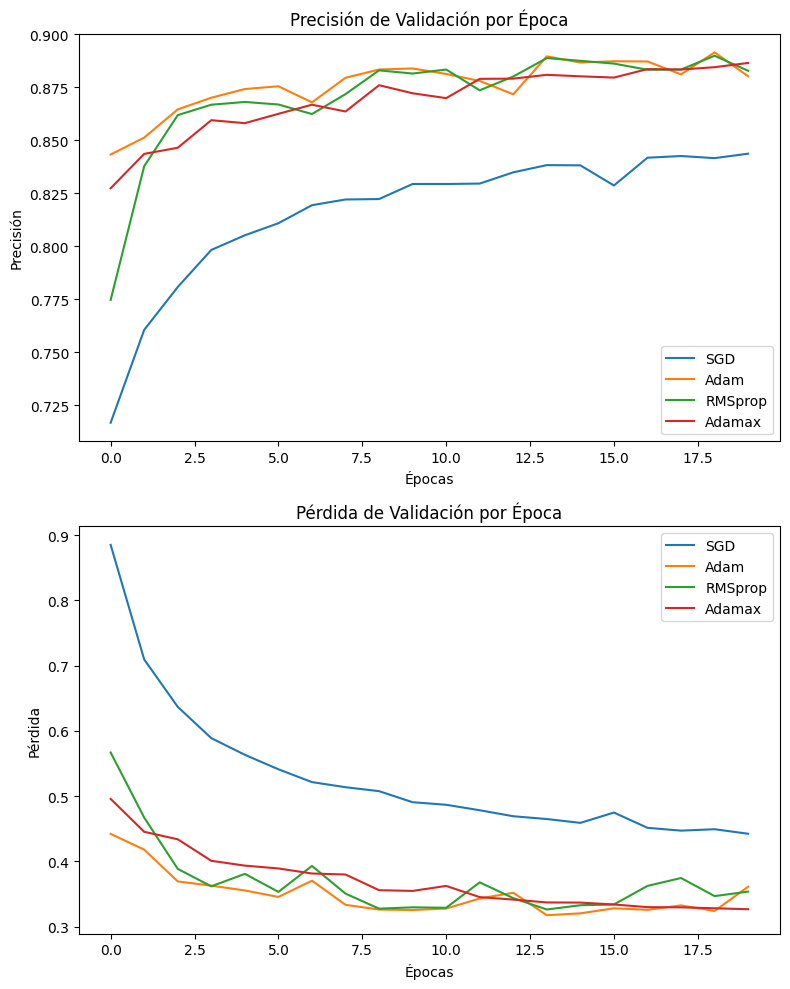

In [ ]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalización de los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Crear y entrenar el modelo
def train_model(optimizer):
    # Crear el modelo
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compilar el modelo
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(x_train, y_train,
                        epochs=20,
                        batch_size=200,
                        validation_data=(x_test, y_test), verbose=0)

    # Devolver los resultados del entrenamiento
    return history.history['val_accuracy'], history.history['val_loss']

# Optimizadores a comparar
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adamax': Adamax()
}

results = {}

# Entrenar modelos usando diferentes optimizadores
for name, opt in optimizers.items():
    val_acc, val_loss = train_model(opt)
    results[name] = {'Accuracy': val_acc, 'Loss': val_loss}
    print(f"Optimizador {name}: Mejor precisión de validación = {max(val_acc):.4f}, Menor pérdida = {min(val_loss):.4f}")

# Visualización de los resultados
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
for name, result in results.items():
    axes[0].plot(result['Accuracy'], label=name)
    axes[1].plot(result['Loss'], label=name)

axes[0].set_title('Precisión de Validación por Época')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend()

axes[1].set_title('Pérdida de Validación por Época')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend()

plt.tight_layout()
plt.show()


#### SGD

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 4s 11ms/step - loss: 2.2763 - accuracy: 0.2747 - val_loss: 2.2348 - val_accuracy: 0.4738
Epoch 2/20
300/300 [==============================] - 2s 6ms/step - loss: 2.1954 - accuracy: 0.5035 - val_loss: 2.1518 - val_accuracy: 

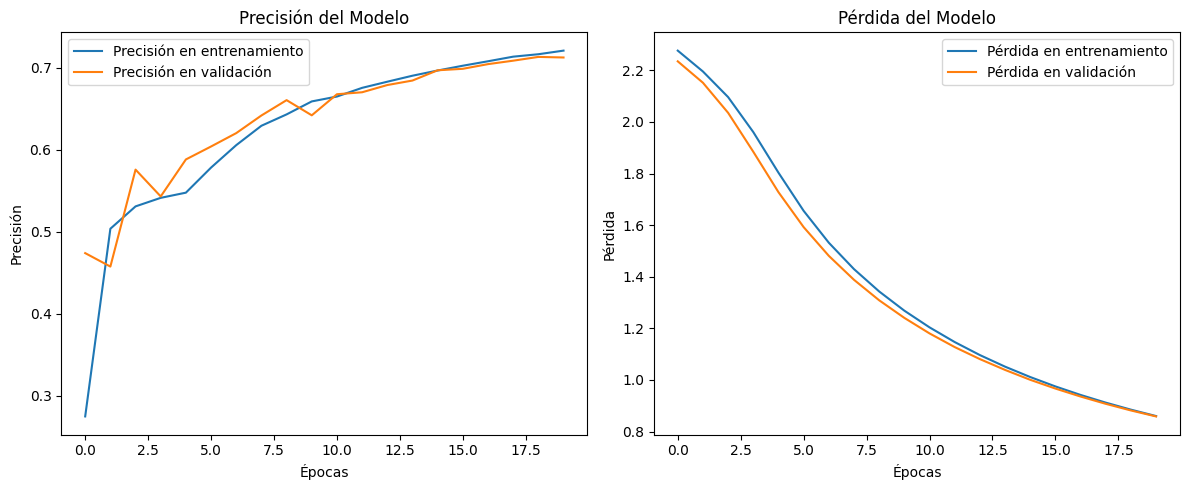

In [ ]:
# Configuración para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Parámetros del modelo
h1 = 128  # Número de neuronas en la capa escondida
N = 784  #
C = 10    # Número de clases

# Crear el modelo
red4 = Sequential()
red4.add(Dense(h1, input_dim=N, activation='sigmoid'))
red4.add(keras.layers.Dense(h1, activation='sigmoid'))
red4.add(Dense(C, activation='softmax'))



# Imprimir un resumen del modelo
red4.summary()

# Compilar el modelo
red4.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

# Entrenar el modelo y guardar el historial
history = red4.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test),
    verbose=1  # Establecer verbose en 1 para visualizar el progreso
)

# Gráfico de precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#### Adam

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 8ms/step - loss: 0.9302 - accuracy: 0.7128 - val_loss: 0.5509 - val_accuracy: 0.8055
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.4716 - accuracy: 0.8349 - val_loss: 0.4839 - val_accuracy: 0

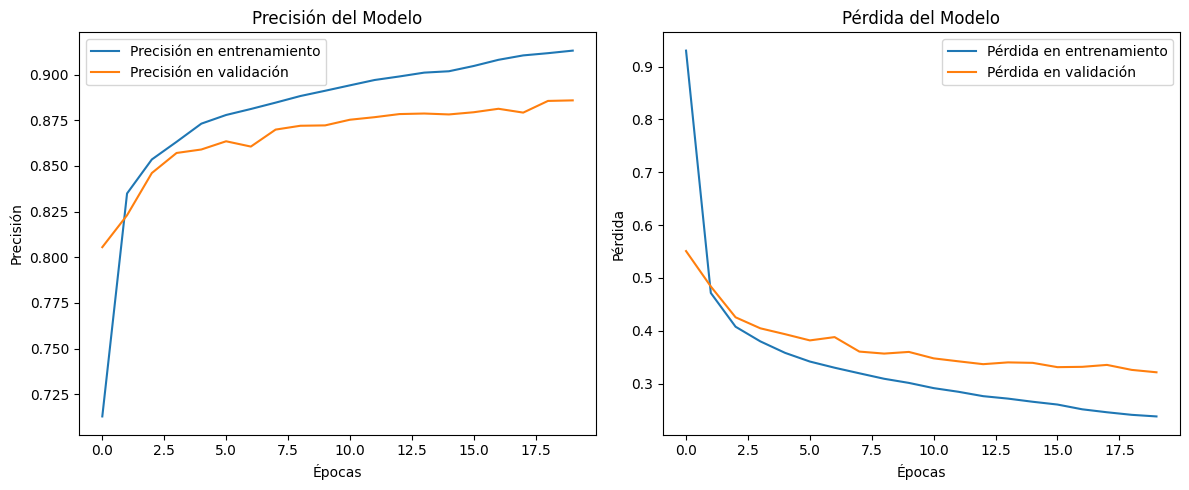

In [ ]:
# Configuración para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Parámetros del modelo
h1 = 128  # Número de neuronas en la capa escondida
N = 784   #
C = 10    # Número de clases

# Crear el modelo
red5 = Sequential()
red5.add(Dense(h1, input_dim=N, activation='sigmoid'))
red5.add(keras.layers.Dense(h1, activation='sigmoid'))
red5.add(Dense(C, activation='softmax'))

# Imprimir un resumen del modelo
red5.summary()

# Compilar el modelo
red5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenar el modelo y guardar el historial
history = red5.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test),
    verbose=1  # Establecer verbose en 1 para visualizar el progreso
)

# Gráfico de precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#### RMSprop

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 8ms/step - loss: 0.9027 - accuracy: 0.7128 - val_loss: 0.5795 - val_accuracy: 0.7879
Epoch 2/20
300/300 [==============================] - 2s 8ms/step - loss: 0.4939 - accuracy: 0.8234 - val_loss: 0.4824 - val_accuracy: 0

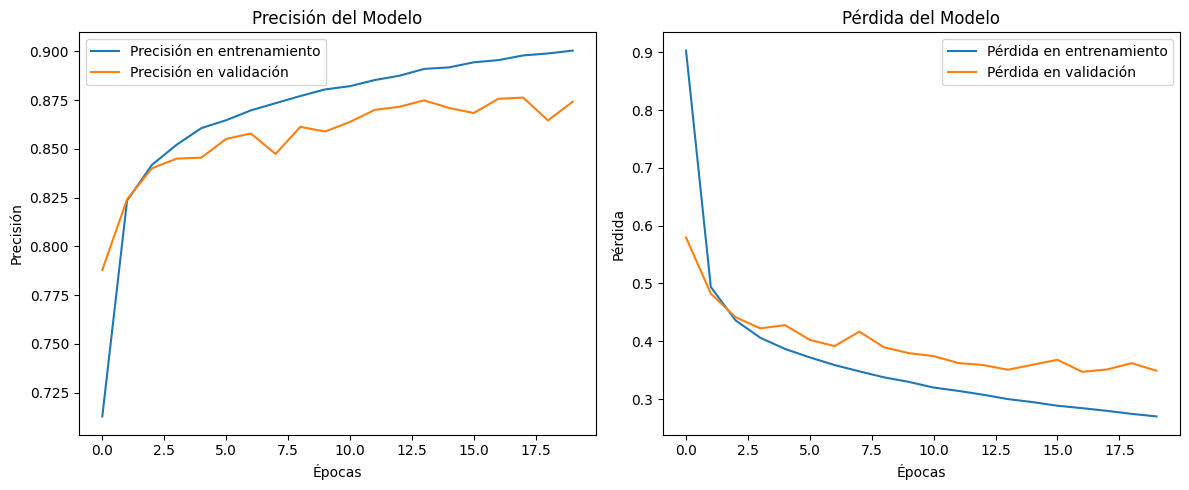

In [ ]:
# Configuración para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Parámetros del modelo
h1 = 128  # Número de neuronas en la capa escondida
N = 784   #
C = 10    # Número de clases

# Crear el modelo
red6 = Sequential()
red6.add(Dense(h1, input_dim=N, activation='sigmoid'))
red6.add(keras.layers.Dense(h1, activation='sigmoid'))
red6.add(Dense(C, activation='softmax'))

# Imprimir un resumen del modelo
red6.summary()

# Compilar el modelo
red6.compile(
    loss='categorical_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy']
)

# Entrenar el modelo y guardar el historial
history = red6.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test),
    verbose=1  # Establecer verbose en 1 para visualizar el progreso
)

# Gráfico de precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#### Adamax

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 3s 8ms/step - loss: 1.1775 - accuracy: 0.6629 - val_loss: 0.7502 - val_accuracy: 0.7493
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.6288 - accuracy: 0.7876 - val_loss: 0.5748 - val_accuracy: 0

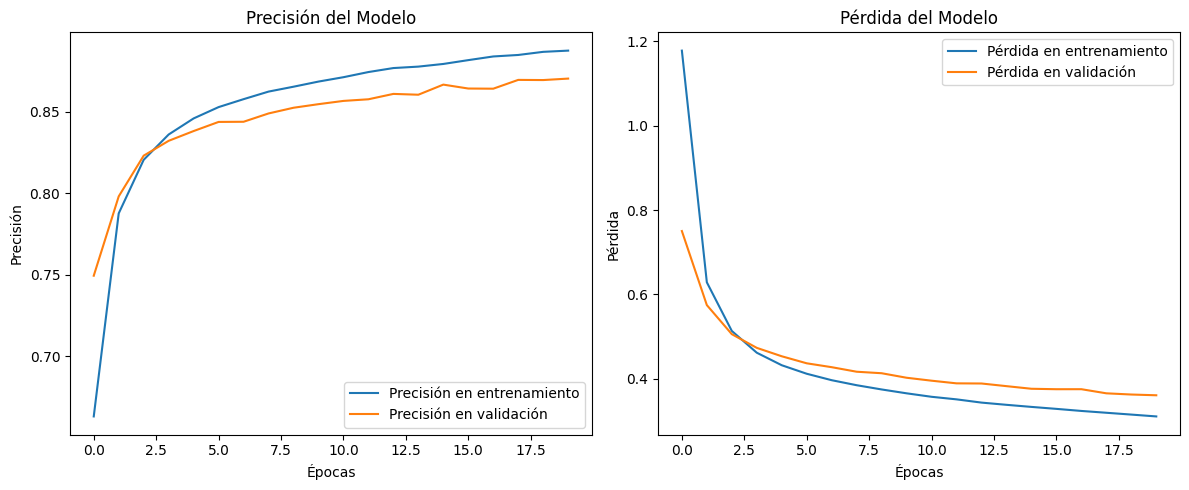

In [ ]:
# Configuración para la reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

# Parámetros del modelo
h1 = 128  # Número de neuronas en la capa escondida
N = 784   #
C = 10    # Número de clases

# Crear el modelo
red7 = Sequential()
red7.add(Dense(h1, input_dim=N, activation='sigmoid'))
red7.add(keras.layers.Dense(h1, activation='sigmoid'))
red7.add(Dense(C, activation='softmax'))

# Imprimir un resumen del modelo
red7.summary()

# Compilar el modelo
red7.compile(
    loss='categorical_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy']
)

# Entrenar el modelo y guardar el historial
history = red7.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=200,
    validation_data=(X_test, Y_test),
    verbose=1  # Establecer verbose en 1 para visualizar el progreso
)

# Gráfico de precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

---

### Comparando Optimizadores

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Adamax } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 2 capas } & \text { 20 epocas} & {0.7045 - 0.8753} & {0.8753- 0.2379} & {0.8742 - 0.2699} & {0.8703 - 0.3112} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

⚛ Los resultados muestran claramente la ventaja de utilizar optimizadores con tasas de aprendizaje adaptativas sobre el optimizador con tasa de aprendizaje fija (SGD) en la tarea de clasificación de imágenes de prendas de vestir. Adam, con su enfoque adaptativo y la incorporación de momentos, ha demostrado ser el más efectivo, mejorando significativamente tanto la precisión como la minimización de la pérdida. Esto subraya la importancia de seleccionar un optimizador que no solo se adapte bien a la naturaleza del conjunto de datos y problema sino que también ofrezca mecanismos para optimizar la convergencia durante el entrenamiento.

⚛ Los optimizadores con tasas de aprendizaje adaptativas como Adam y RMSprop son recomendables para la mayoría de las aplicaciones modernas de Deep Learning, donde la eficiencia y la efectividad del entrenamiento son cruciales para el éxito del modelo. En entornos donde la estabilidad frente a gradientes extremos es necesaria, Adamax puede ser una opción viable aunque en este caso particular, Adam demostró ser superior.

---

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

Epoch 1/20
300/300 [==============================] - 3s 5ms/step - loss: 0.5976 - accuracy: 0.7970
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.8521
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.8661
Epoch 4/20
300/300 [==============================] - 1s 5ms/step - loss: 0.3575 - accuracy: 0.8727
Epoch 5/20
300/300 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.8813
Epoch 6/20
300/300 [==============================] - 2s 8ms/step - loss: 0.3204 - accuracy: 0.8846
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.3072 - accuracy: 0.8887
Epoch 8/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2920 - accuracy: 0.8941
Epoch 9/20
300/300 [==============================] - 2s 5ms/step - loss: 0.2800 - accuracy: 0.8993
Epoch 10/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2752 - accuracy: 0.8993

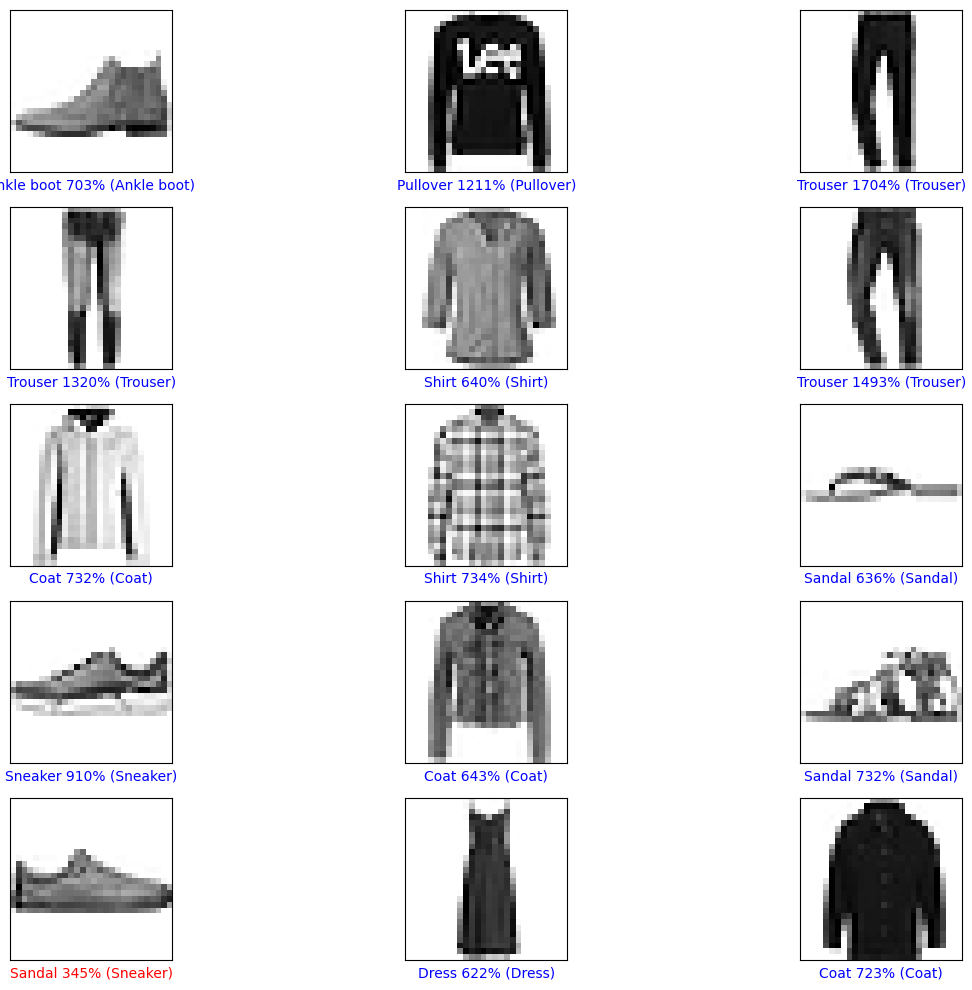

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Crear una lista de nombres de clase para las etiquetas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20, batch_size=200)

# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(x_test)

# Función para mostrar una imagen junto con la predicción y la etiqueta real
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

# Elegir un conjunto de índices para mostrar
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)

plt.tight_layout()
plt.show()



In [ ]:
#####################################################################
#Programar aquí

#####################################################################

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso.

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.


In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.